## <b> Mobile Price Range Prediction </b>

______________________________

### <b> Importing Libraries </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
sns.set_palette('Set2')
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 21)

In [2]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

In [3]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# Mobile Phone Features Description

## Features Overview

1. **battery_power**  
   Total battery capacity of the mobile phone in mAh (milliampere-hour).

2. **blue**  
   Indicator of Bluetooth support (1 if Bluetooth is supported, 0 otherwise).

3. **clock_speed**  
   The processing speed of the mobile's CPU in GHz.

4. **dual_sim**  
   Indicator of dual SIM support (1 if the phone supports dual SIM, 0 otherwise).

5. **fc**  
   Front camera resolution in megapixels.

6. **four_g**  
   Indicator of 4G network support (1 if 4G is supported, 0 otherwise).

7. **int_memory**  
   Internal memory of the phone in GB.

8. **m_dep**  
   Mobile depth in cm.

9. **mobile_wt**  
   Weight of the mobile phone in grams.

10. **n_cores**  
    Number of cores in the mobile's processor.

11. **pc**  
    Primary camera resolution in megapixels.

12. **px_height**  
    Height of the mobile screen resolution in pixels.

13. **px_width**  
    Width of the mobile screen resolution in pixels.

14. **ram**  
    Random Access Memory (RAM) capacity of the phone in MB.

15. **sc_h**  
    Screen height of the mobile in cm.

16. **sc_w**  
    Screen width of the mobile in cm.

17. **talk_time**  
    Maximum time (in hours) the phone can support continuous talk time.

18. **three_g**  
    Indicator of 3G network support (1 if 3G is supported, 0 otherwise).

19. **touch_screen**  
    Indicator of touchscreen support (1 if the phone has a touchscreen, 0 otherwise).

20. **wifi**  
    Indicator of Wi-Fi support (1 if Wi-Fi is supported, 0 otherwise).

21. **price_range**  
    A categorical variable representing the price range of the mobile phone:
    - **0**: Low cost
    - **1**: Medium cost
    - **2**: High cost
    - **3**: Very high cost


In [4]:
print(f'Train Shape: - {train_data.shape}')
print(f'Test Shape: - {test_data.shape}')

Train Shape: - (2000, 21)
Test Shape: - (1000, 21)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### <b> Checking for Null values </b>

In [7]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
# Check for duplicate rows
duplicate_rows = train_data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Print the result
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [9]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#### Target variable is a Price_Range and not actual price of the mobile

### <b> EDA </b>

<Axes: >

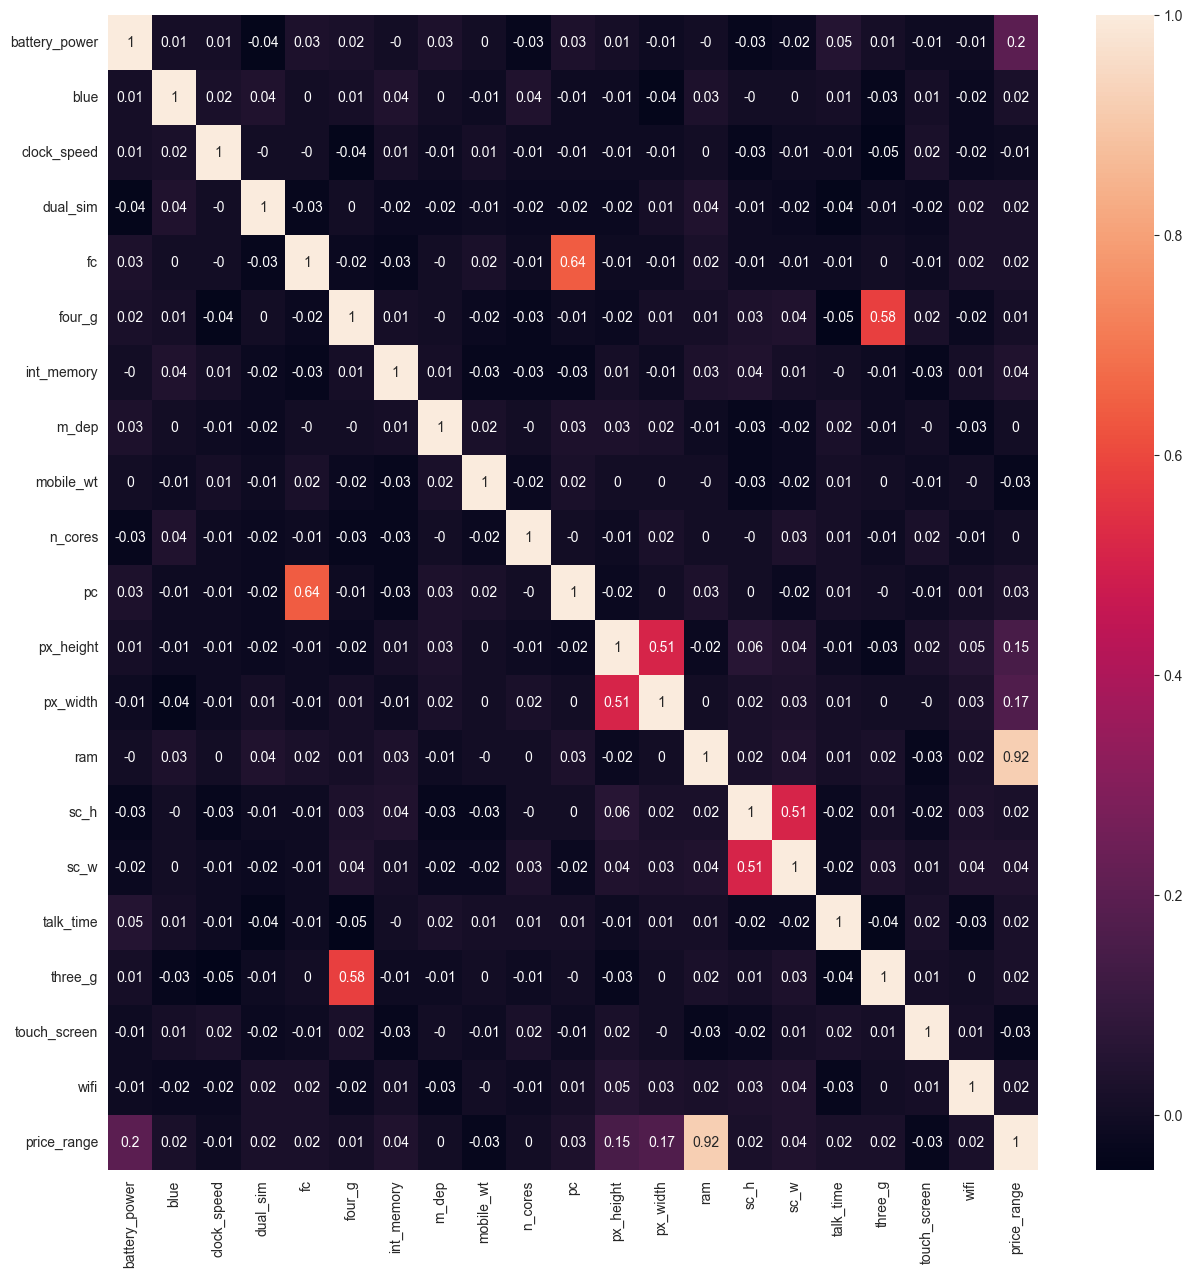

In [10]:
fig, ax = plt.subplots(1,1, figsize = (15,15))
sns.heatmap(np.round(train_data.corr(), 2), annot=True, ax = ax)

<font size = 6>Observation: - </font><br><br><b>Price_Range is most related with this columns </b><br><br>
                                            1) Ram<br>
                                            2) px_width<br>
                                            3) px_height<br>
                                            4) battery_power<br>
___________________________________________________________________________________________________________________

[Text(0, 0, '500'), Text(0, 0, '500'), Text(0, 0, '500'), Text(0, 0, '500')]

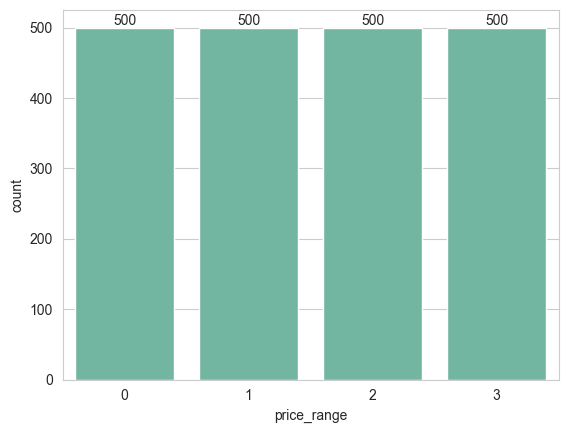

In [11]:
ax = sns.countplot(x = train_data['price_range'])
ax.bar_label(ax.containers[0])

<font size = 6>Observation: - </font><br><br>We have 500 data for each of the price ranges
__________________________________________________________________________________________

### Comparison bettween Price Range and Battery Power

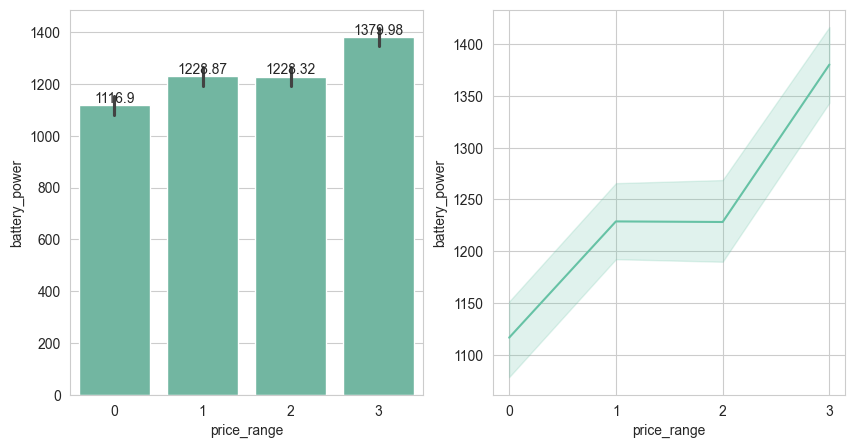

In [12]:
fig, ax  = plt.subplots(1, 2, figsize = (10,5))
sns.barplot(x = train_data['price_range'], y = train_data['battery_power'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.lineplot(x = train_data['price_range'], y = train_data['battery_power'], ax = ax[1])
ax[1].set_xticks([0, 1, 2, 3])

<font size = 6>Observation: - </font><br><br>More the battery life of the phone more will be the price range<br>
Price_range between 1 and 2 have majorly same battery_powers
_______________________________________________________________________________________________

### Bluetooth Vs Price Range

<Axes: xlabel='blue', ylabel='price_range'>

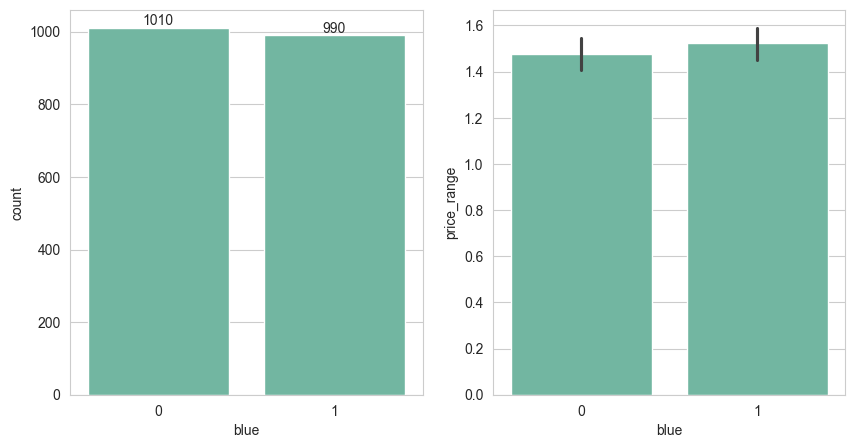

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(x = train_data['blue'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.barplot(x = train_data['blue'], y = train_data['price_range'])

<font size = 6>Observation: - </font><br><br>More than half of the mobiles dont have bluetooth<br>
The ones with bluetooth have little higher price range than the other ones
______________________________________________________________________________________________________

### Clock Speed Vs Price Range

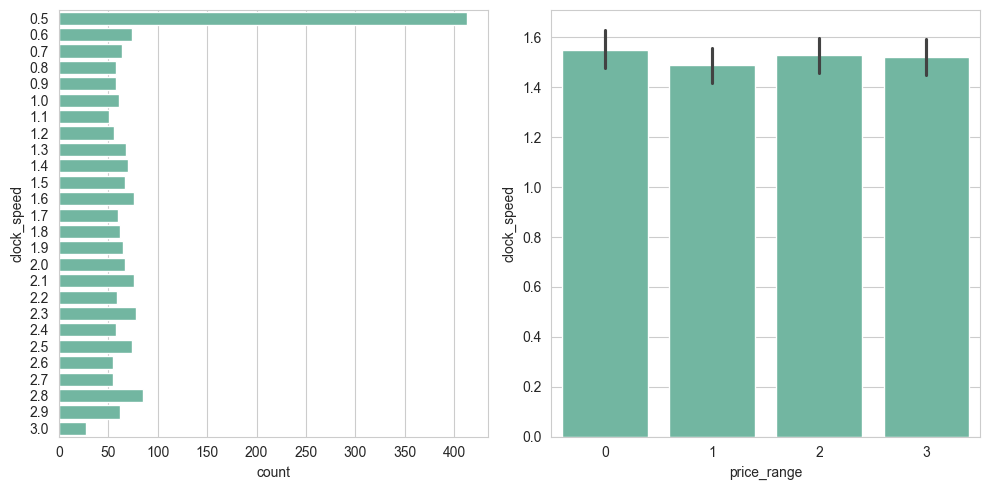

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(y = train_data['clock_speed'], ax = ax[0])

sns.barplot(x = train_data['price_range'], y = train_data['clock_speed'], ax = ax[1])
ax[1].set_xticks([0,1,2,3])
plt.tight_layout()

<font size = 6>Observation: - </font><br><br>Most of the phones have low clock speed and are slow<br>
According to data price dont affect on basis of clock speed they are somewhat same
____________________________________________________________________________________

### Dual Sim vs Price Range

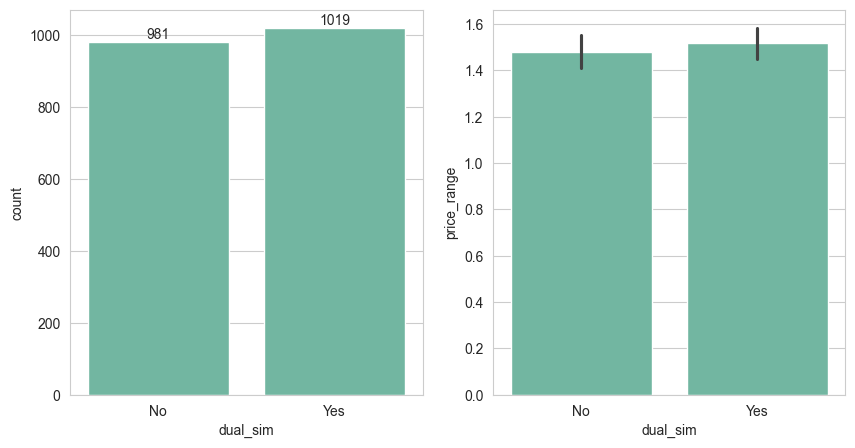

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = train_data['dual_sim'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_xticks([0,1], ['No', 'Yes'])

sns.barplot(x = train_data['dual_sim'], y = train_data['price_range'], ax = ax[1])
ax[1].set_xticks([0,1], ['No', 'Yes'])

<font size = 6>Observation: - </font><br><br>Half of the phones dont have dual sim<br>
According to data price dont affect whether phone has a dual sim or not but there is a slight high price for dual sim phones
________________________________

### Camera Vs Price Range

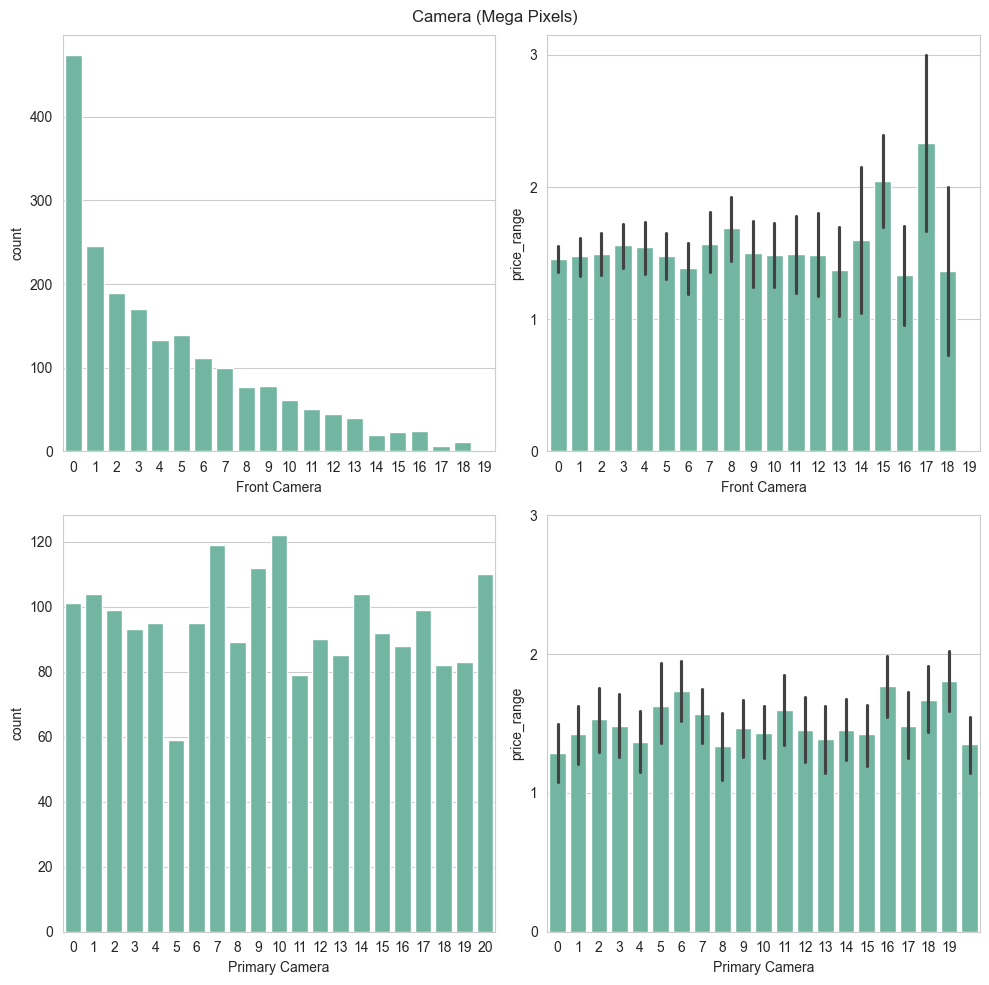

In [16]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

sns.countplot(x = train_data['fc'], ax = ax[0][0])
ax[0][0].set_xlabel("Front Camera")

sns.barplot(x = train_data['fc'], y = train_data['price_range'],ax = ax[0][1])
ax[0][1].set_xticks(np.arange(0, 20))
ax[0][1].set_yticks([0, 1, 2, 3])
ax[0][1].set_xlabel("Front Camera")

sns.countplot(x = train_data['pc'], ax = ax[1][0])
ax[1][0].set_xlabel("Primary Camera")

sns.barplot(x = train_data['pc'], y = train_data['price_range'],ax = ax[1][1])
ax[1][1].set_xticks(np.arange(0, 20))
ax[1][1].set_yticks([0, 1, 2, 3])
ax[1][1].set_xlabel("Primary Camera")

fig.suptitle("Camera (Mega Pixels)")
plt.tight_layout()

<font size = 6>Observation: - </font><br>
1) Around 400+ mobiles don't have front camera and there are very few mobiles with high pixel front cameras
2) Around 100 mobiles dont't have primary camera and the highest primary camera pixel is 20
3) According to data Price range is not affected by the camera pixels.
________________________________

### Phone Genration vs Price Range

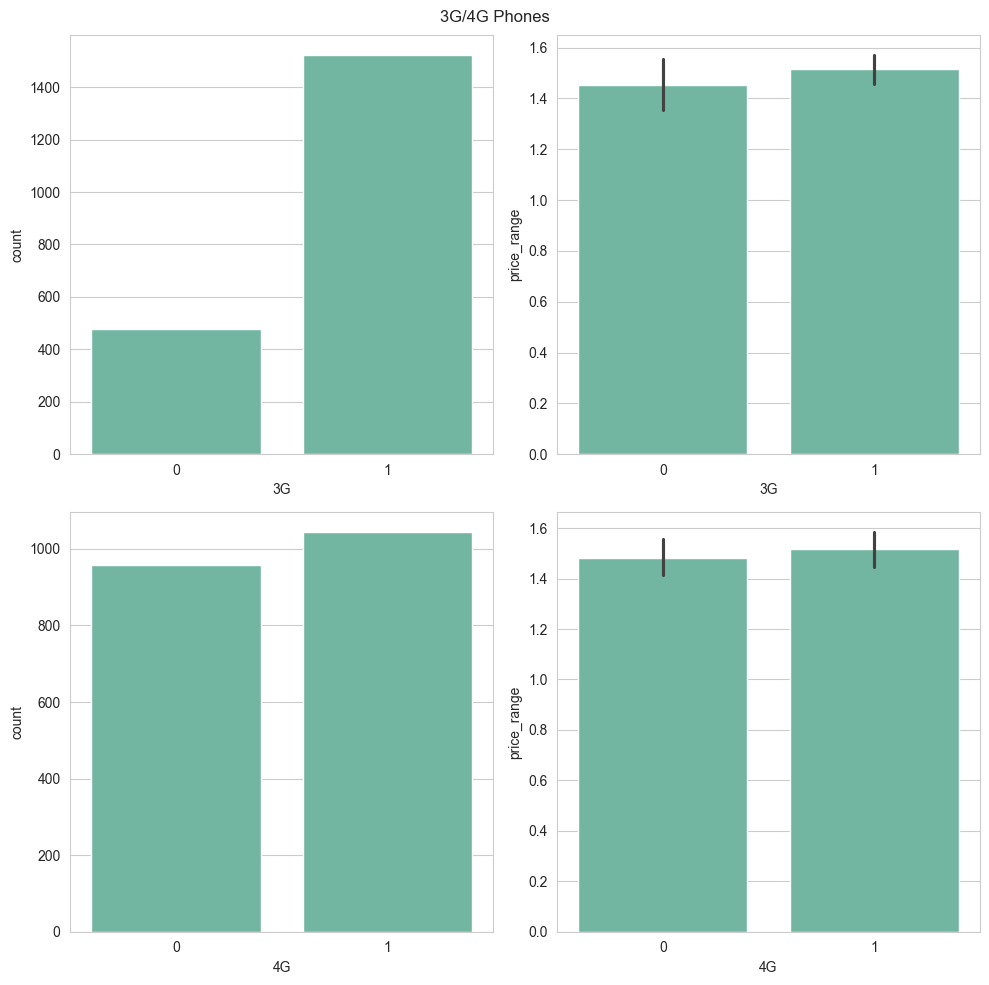

In [17]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

sns.countplot(x = train_data['three_g'], ax = ax[0][0])
ax[0][0].set_xlabel("3G")

sns.barplot(x = train_data['three_g'], y = train_data['price_range'],ax = ax[0][1])
ax[0][1].set_xlabel("3G")

sns.countplot(x = train_data['four_g'], ax = ax[1][0])
ax[1][0].set_xlabel("4G")

sns.barplot(x = train_data['four_g'], y = train_data['price_range'],ax = ax[1][1])
ax[1][1].set_xlabel("4G")

fig.suptitle("3G/4G Phones")
plt.tight_layout()

<font size = 6>Observation: - </font><br>
1) More than Half of the phones have 3G facality and have a slight high price than the ones which do not have it
2) Half of the phones don't have 4G facality same as 3G slight change in price
________________________________

### Int Memory

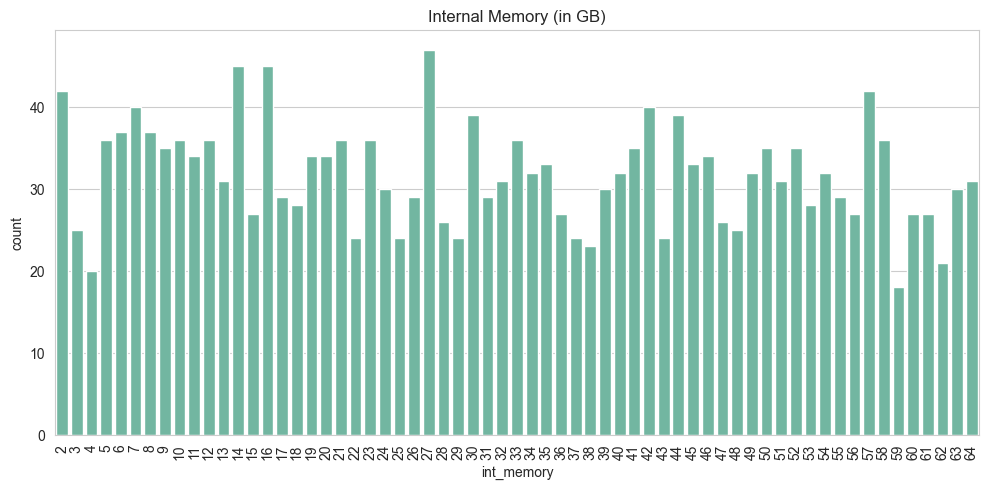

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x = train_data['int_memory'])
plt.xticks(rotation = 90)
plt.title("Internal Memory (in GB)")
plt.tight_layout()

<font size = 6>Observation: - </font><br>
1) 120+ Phones have 27GB, 14GB, 16GB of  int memory
2) Around 100 phones only have less then 5GB of int memory
3) Highest int memory is with 64GB of around 30+ phones
________________________________

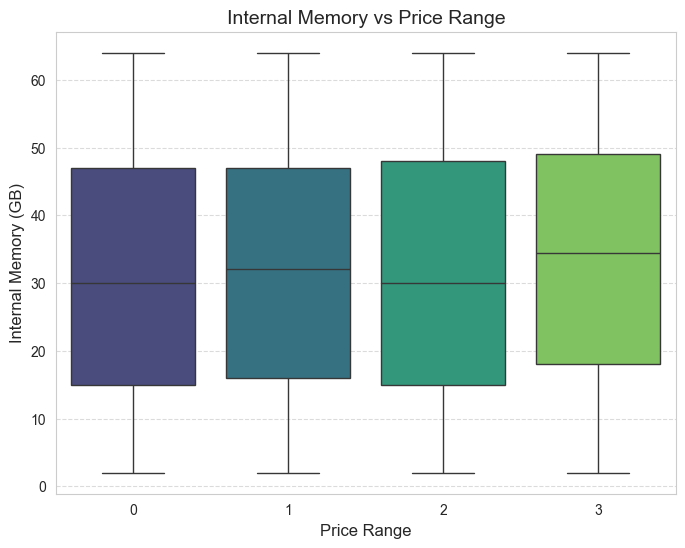

In [19]:
# Create a boxplot to visualize the relationship between internal memory and price range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='int_memory', data=train_data, palette='viridis')
plt.title('Internal Memory vs Price Range', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Internal Memory (GB)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Increase in Internal Memory with Price Range: Higher price ranges tend to have higher median internal memory, indicating that more expensive phones typically offer greater storage capacity.

Variation within Price Ranges: The variability in internal memory is greater for the mid and high price ranges, suggesting diverse storage options in these categories.

Outliers: A few outliers exist in the lower price range, showing some phones with unusually high internal memory for their cost.

---------------------------------------------------------------------------------------------------------------------------

### Depth

Text(0.5, 1.0, 'Mobile Depth (in cm)')

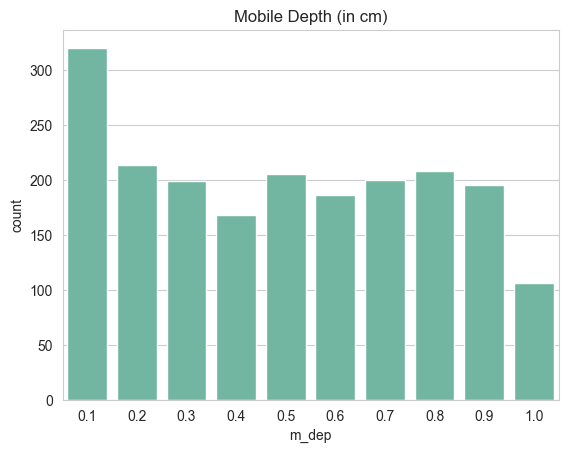

In [20]:
sns.countplot(x = train_data['m_dep'])
plt.title("Mobile Depth (in cm)")

<font size = 6>Observation: - </font><br>
1) 300+ mobiles have 1mm of Depth
2) 100+ mobiles have 10mm of Depth
3) 400+ mobiles have depth between 2mm-9mm
________________________________

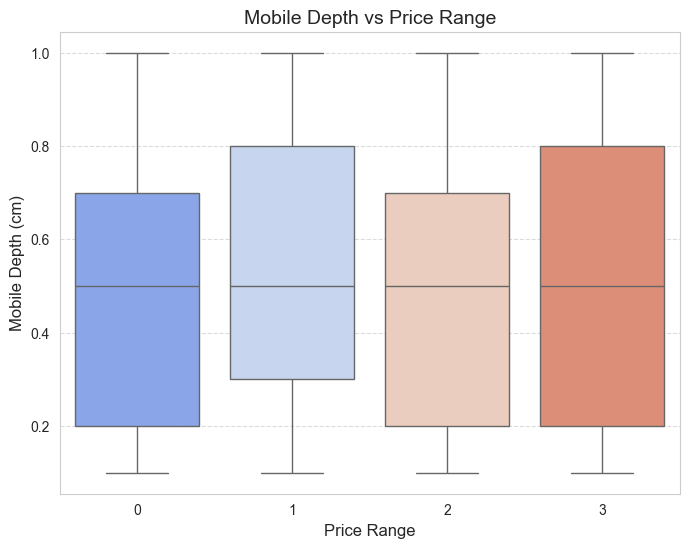

In [21]:
# Create a boxplot to visualize the relationship between mobile depth and price range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='m_dep', data=train_data, palette='coolwarm')
plt.title('Mobile Depth vs Price Range', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Mobile Depth (cm)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Consistent Mobile Depth Across Price Ranges: The median and interquartile range of mobile depth remain fairly consistent across all price ranges, indicating that mobile depth is not strongly influenced by price.

Slightly Narrower Distribution for Higher Price Ranges: Higher price ranges show slightly less variability in mobile depth compared to lower price ranges, but the difference is minimal.

No Significant Outliers: The boxplot does not reveal any significant outliers, suggesting that mobile depth values are generally uniform within each price category.

-----------------------------------------------------------------------------------------------------------------------

### Mobile Weight

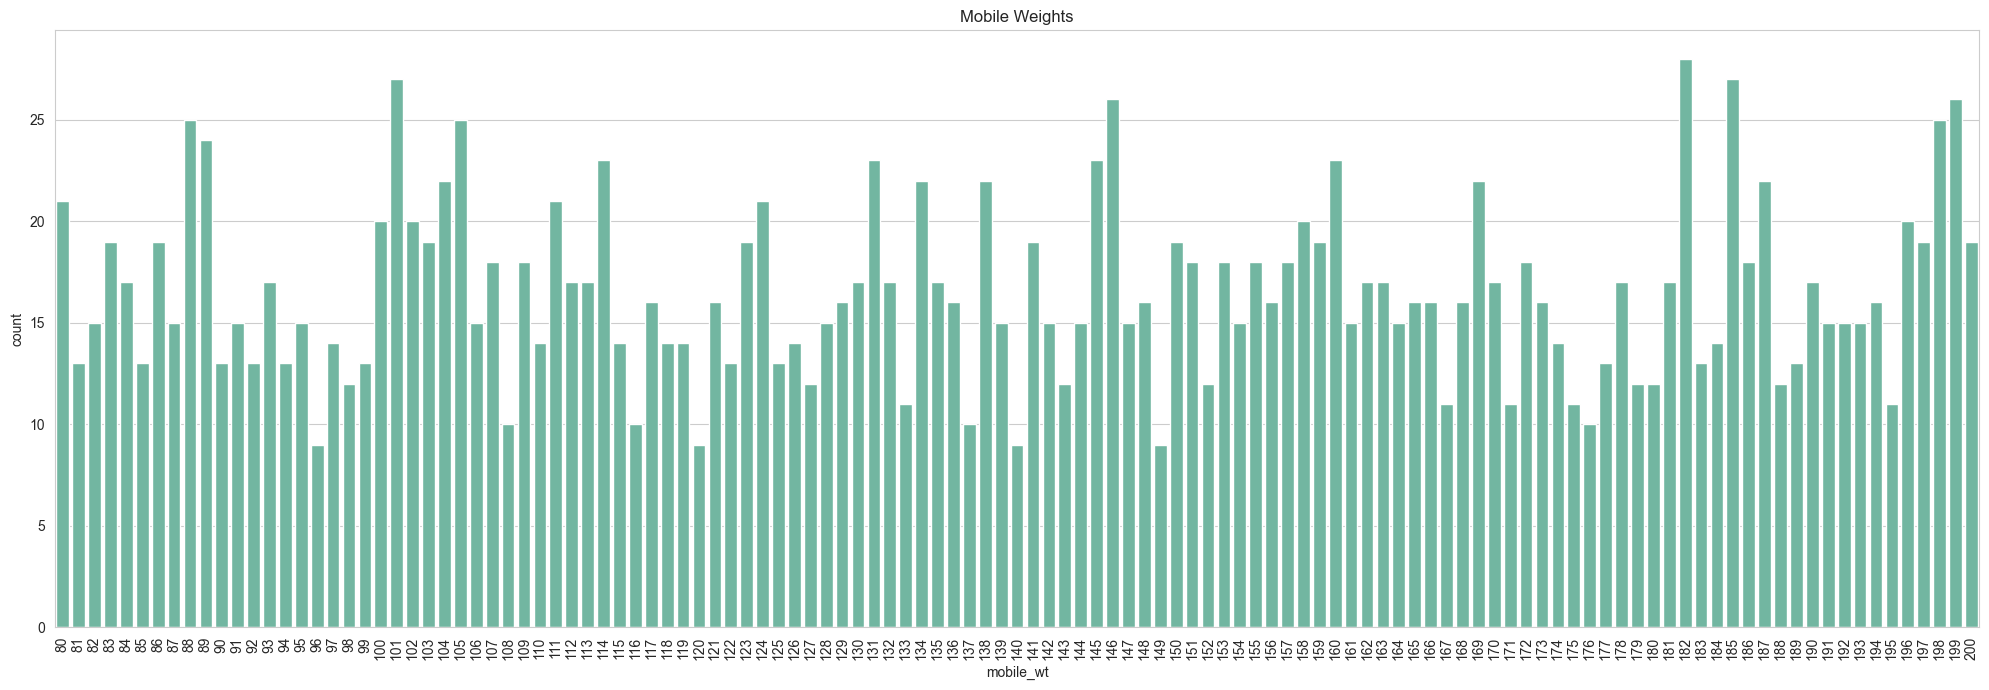

In [22]:
plt.figure(figsize=(20,7))
sns.countplot(x=train_data['mobile_wt'])
plt.xticks(rotation = 90)
plt.title("Mobile Weights")
plt.tight_layout()

<font size = 6>Observation: - </font><br>
1) Mobile weights are between 80g-200g
2) Average weight of mobile phones is 140g
________________________________

### Number of Cores

<Axes: xlabel='n_cores', ylabel='count'>

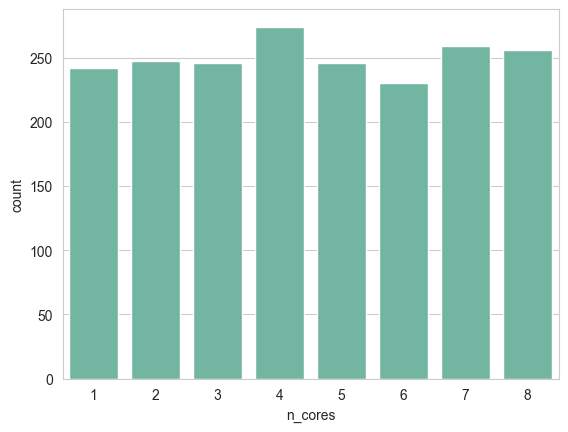

In [23]:
sns.countplot(x=train_data['n_cores'])

<font size = 6>Observation: - </font><br>
1) We have Mobile phones cores ranging between 1-8
2) Mobiles with 4 core is slight high around 250+
________________________________

### Pixel Height and Width

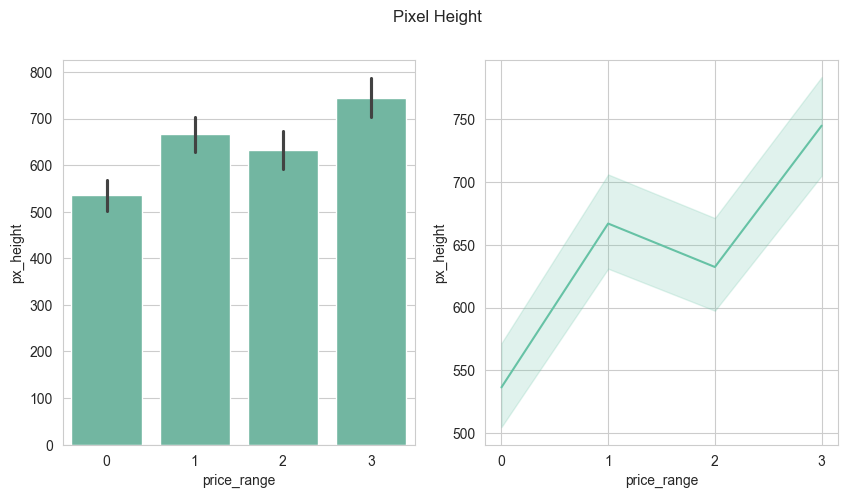

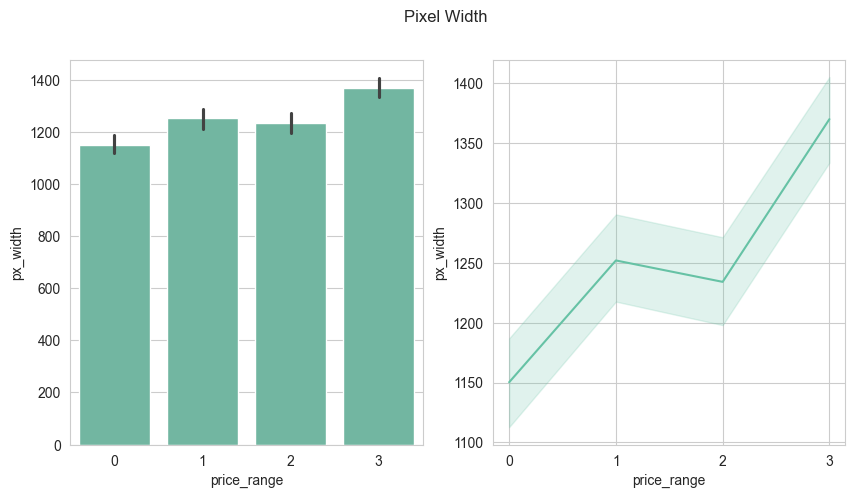

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

fig.suptitle("Pixel Height")

sns.barplot(x = train_data['price_range'], y = train_data['px_height'], ax = ax[0])

sns.lineplot(x = train_data['price_range'], y = train_data['px_height'], ax = ax[1])
ax[1].set_xticks([0,1,2,3])

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

fig.suptitle("Pixel Width")

sns.barplot(x = train_data['price_range'], y = train_data['px_width'], ax = ax[0])

sns.lineplot(x = train_data['price_range'], y = train_data['px_width'], ax = ax[1])
ax[1].set_xticks([0,1,2,3])
ax[1].set_xticks([0,1,2,3])

<font size = 6>Observation: - </font><br>
1) With increase of pixel Height and width the price also increases
2) At price range of 1 and 2, The price range of 2 has low pixel width and height then the price range of 1
________________________________

#### Also there are 2 columns with 0 pixel height

In [25]:
# So looking into the data there were other columns with same width so replacing them with there particular heights

train_data[(train_data['px_width'] == 1987) | (train_data['px_width'] == 994)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
324,1698,0,2.1,0,5,1,18,0.9,160,6,20,363,994,796,13,3,14,1,0,1,0
588,1966,1,1.4,1,2,0,40,0.9,185,8,18,1197,1987,1185,11,2,20,0,1,0,2
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,1,0,1


In [26]:
#Replacing this values accordingly
train_data.loc[1481, 'px_height'] = 1197
train_data.loc[1933, 'px_height'] = 363

--------------------------------------------------------------------------------------------------------------

### Ram

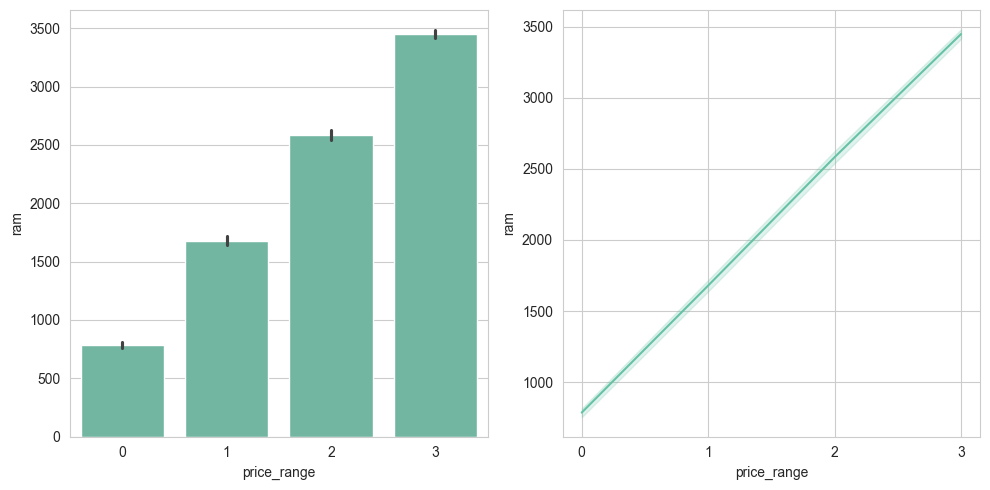

In [27]:
fig, ax  = plt.subplots(1, 2, figsize = (10,5))

sns.barplot(x = train_data['price_range'], y = train_data['ram'], ax = ax[0])

sns.lineplot(x = train_data['price_range'], y = train_data['ram'], ax = ax[1])
ax[1].set_xticks([0, 1, 2, 3])

plt.tight_layout()

<font size = 6>Observation: - </font><br>
1) As the Ram increases the Price also increases
2) The highest ram size is 4GB or near not more than that in the data
________________________________

### Screen Size

Text(0, 0.5, '')

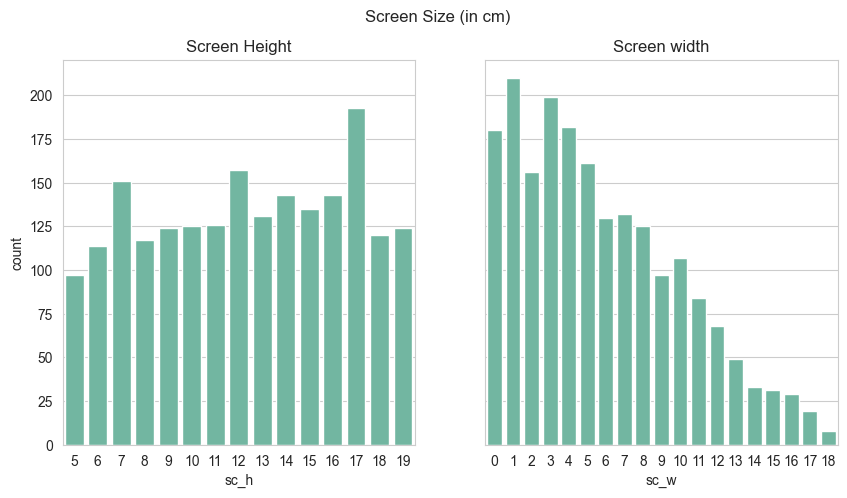

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5), sharey=True)

fig.suptitle("Screen Size (in cm)")

sns.countplot(x=train_data['sc_h'], ax = ax[0])
ax[0].set_title("Screen Height")

sns.countplot(x=train_data['sc_w'], ax = ax[1])
ax[1].set_title("Screen width")
ax[1].set_ylabel("")

<font size = 6>Observation: - </font><br>
1) Screen height ranges between 5cm-19cm
2) About 175+ mobile phones have screen height of 17
3) Screen width ranges between 0cm-18cm (But width cannot be zero so this are the wrong data so we need to remove this)
4) Also screen width of 1cm-3cm are also quite small but we will keep those data
________________________________

In [29]:
#Removing the rows which have 0 screen width
train_data = train_data[~(train_data['sc_w'] == 0)]

#Also for the testing dataset
test_data = test_data[~((test_data['sc_w'] == 0) | (test_data['px_height'] == 0))]

----------------------------------------------------------------------------------------------------------------------

### Talk Time

<Axes: xlabel='talk_time', ylabel='count'>

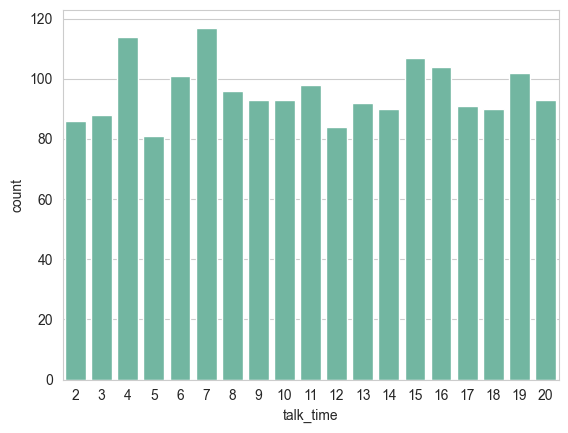

In [30]:
sns.countplot(x=train_data['talk_time'])

<font size = 6>Observation: - </font><br>
1) Talk-time ranges between 2hrs-20hrs
2) about 200+ phones have talk-time of 4-7 hrs
________________________________

### Touch Screen

Text(0.5, 0.98, 'Touch Screen facility')

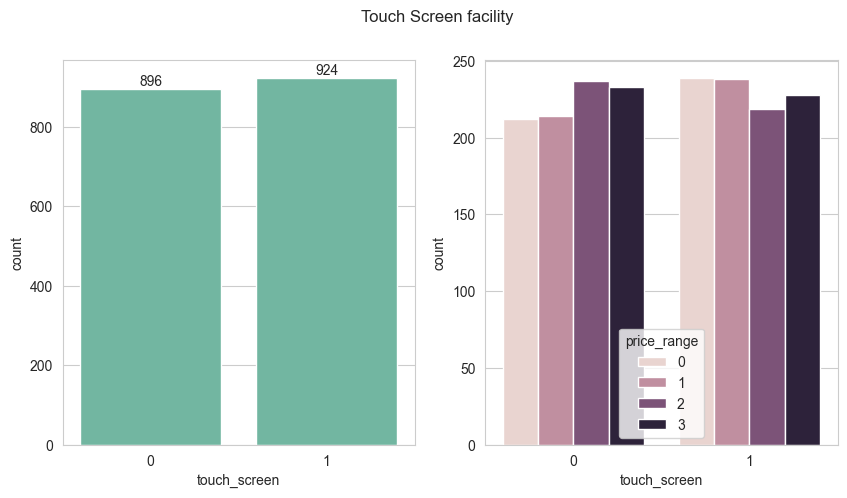

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(x = train_data['touch_screen'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.countplot(x = train_data['touch_screen'], hue = train_data['price_range'])

fig.suptitle("Touch Screen facility")

<font size = 6>Observation: - </font><br>
1) More than half of the phones dont have touch screen facality
2) The ones with not having touch screen facality have high number of phones between price_range of 2-3
3) And ones having touch screen facality have low number of phones between price_range between 2-3
________________________________

### Wi-Fi Facility

Text(0.5, 0.98, 'WIFI facility')

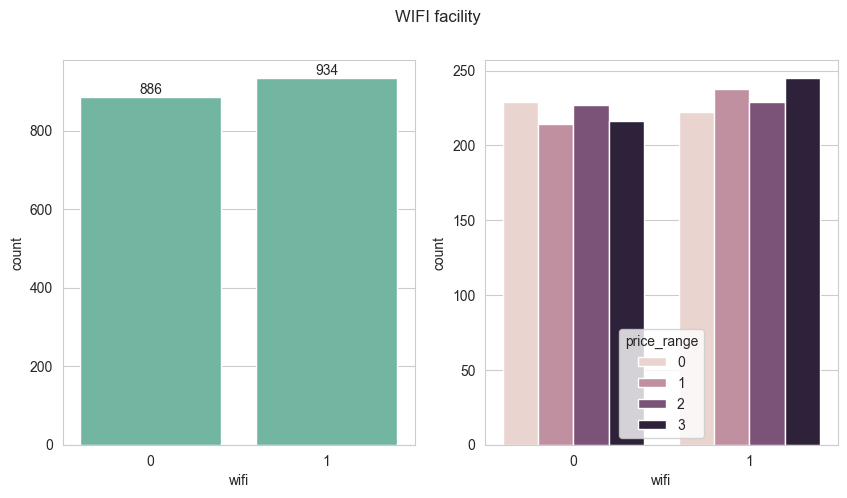

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(x = train_data['wifi'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.countplot(x = train_data['wifi'], hue = train_data['price_range'])

fig.suptitle("WIFI facility")

<font size = 6>Observation: - </font><br>
1) More than half of the phones dont have wifi facility
2) Price ranges are same for the phones not having wifi facility
3) Price ranges are slightly increasing with wifi facility
________________________________

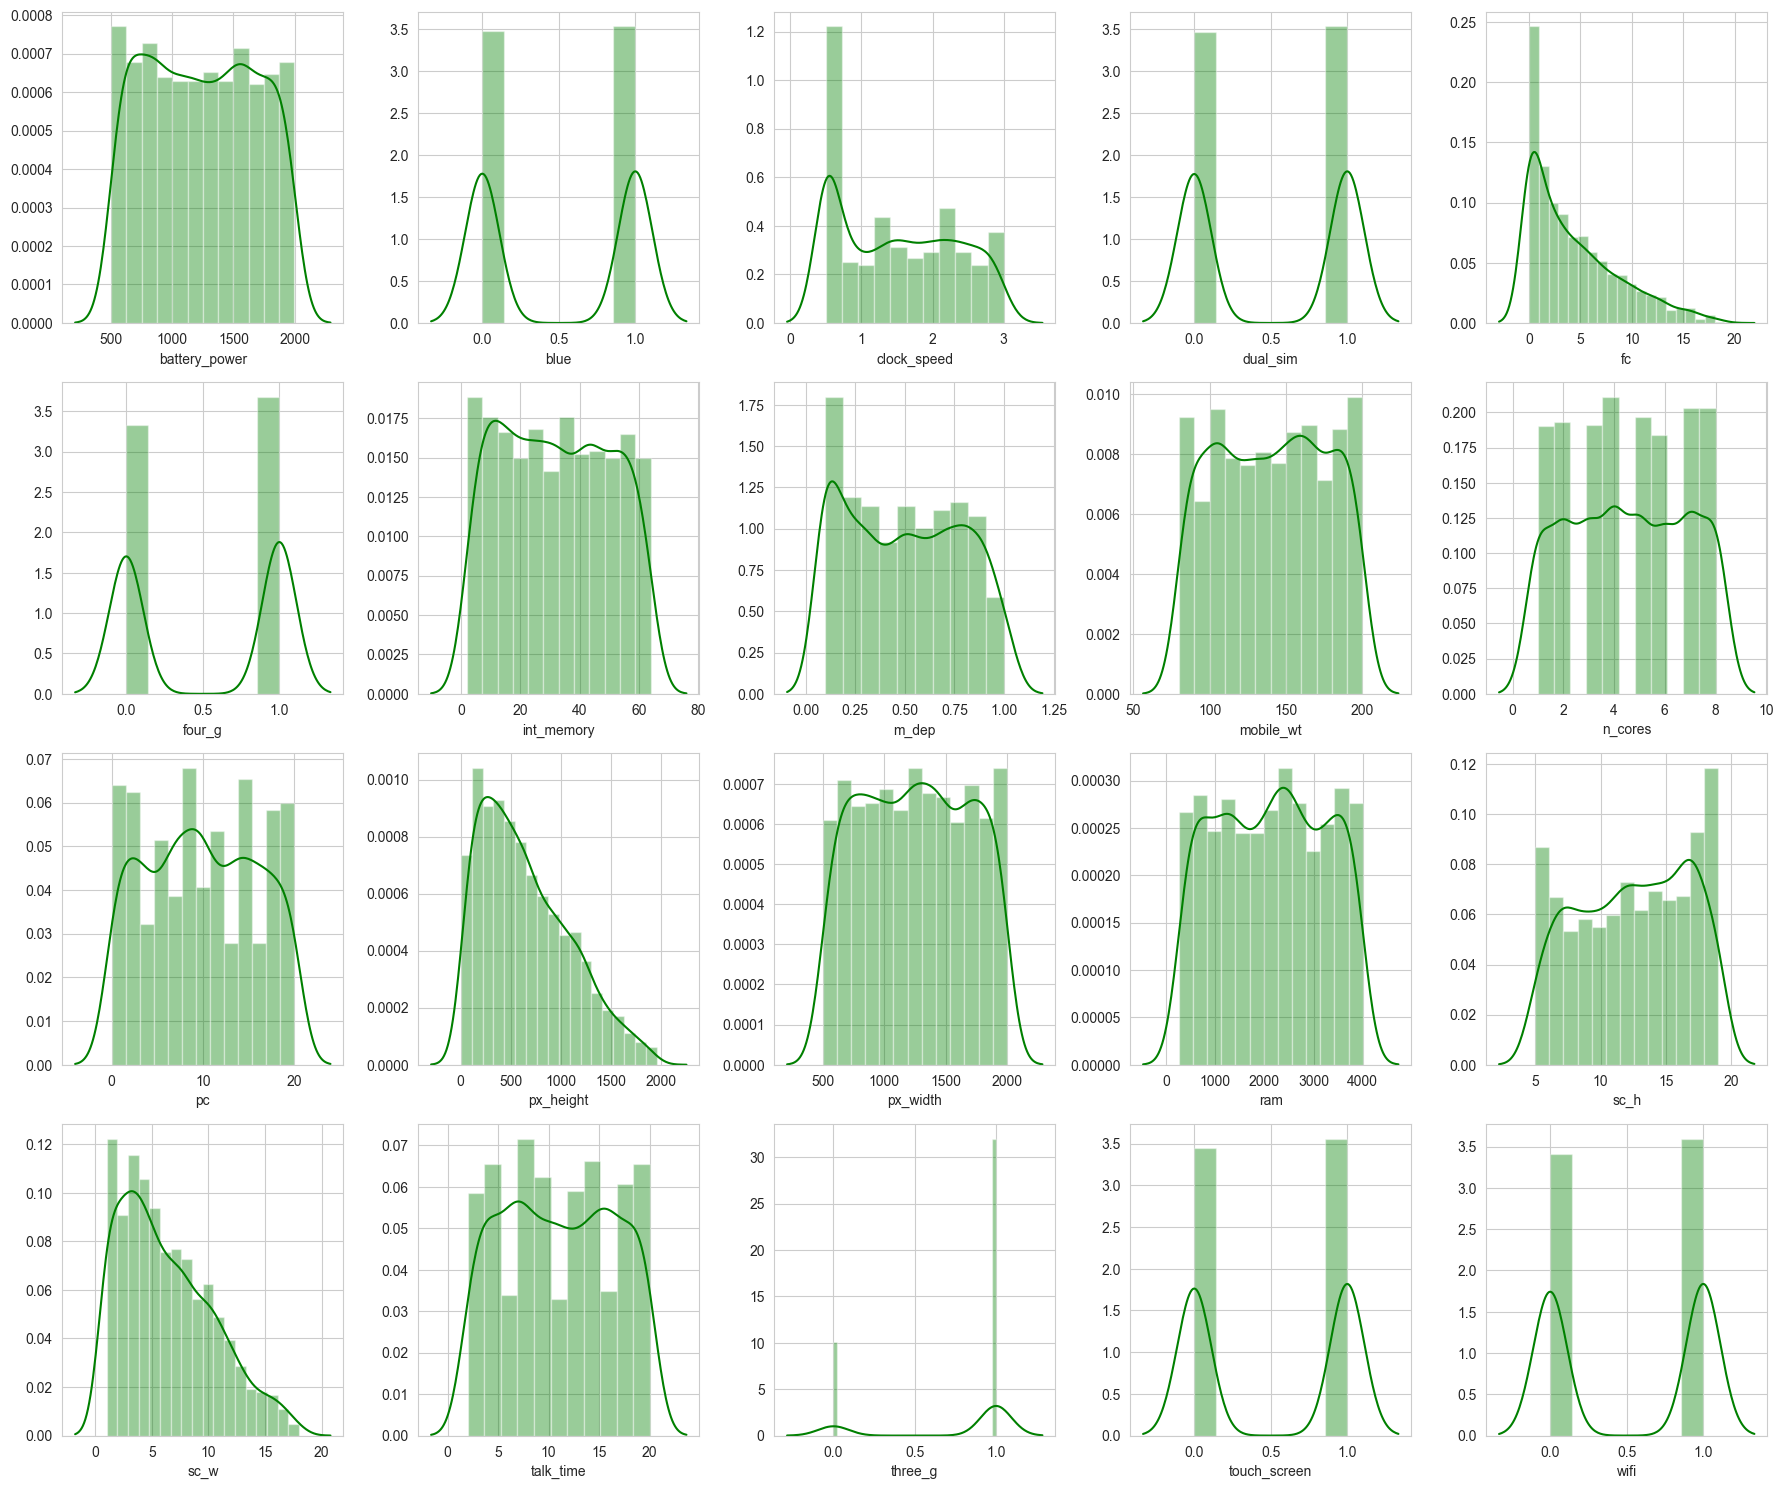

In [33]:
fig, ax = plt.subplots(4, 5, figsize = (18, 15))
count = 0
for i in range(4):
    for j in range(5):
        sns.distplot(train_data[train_data.columns[count]], ax = ax[i][j], color='green')
        ax[i][j].set_ylabel("")
        count += 1
plt.tight_layout()

<font size = 6>Observation: - </font><br>
1) Most of them are skewed and others are discrete so skipping them
2) Sum of them look like log normal distribution  like (fc, sc_w) but the data seems tree so not converting them to gaussian distribution
________________________________

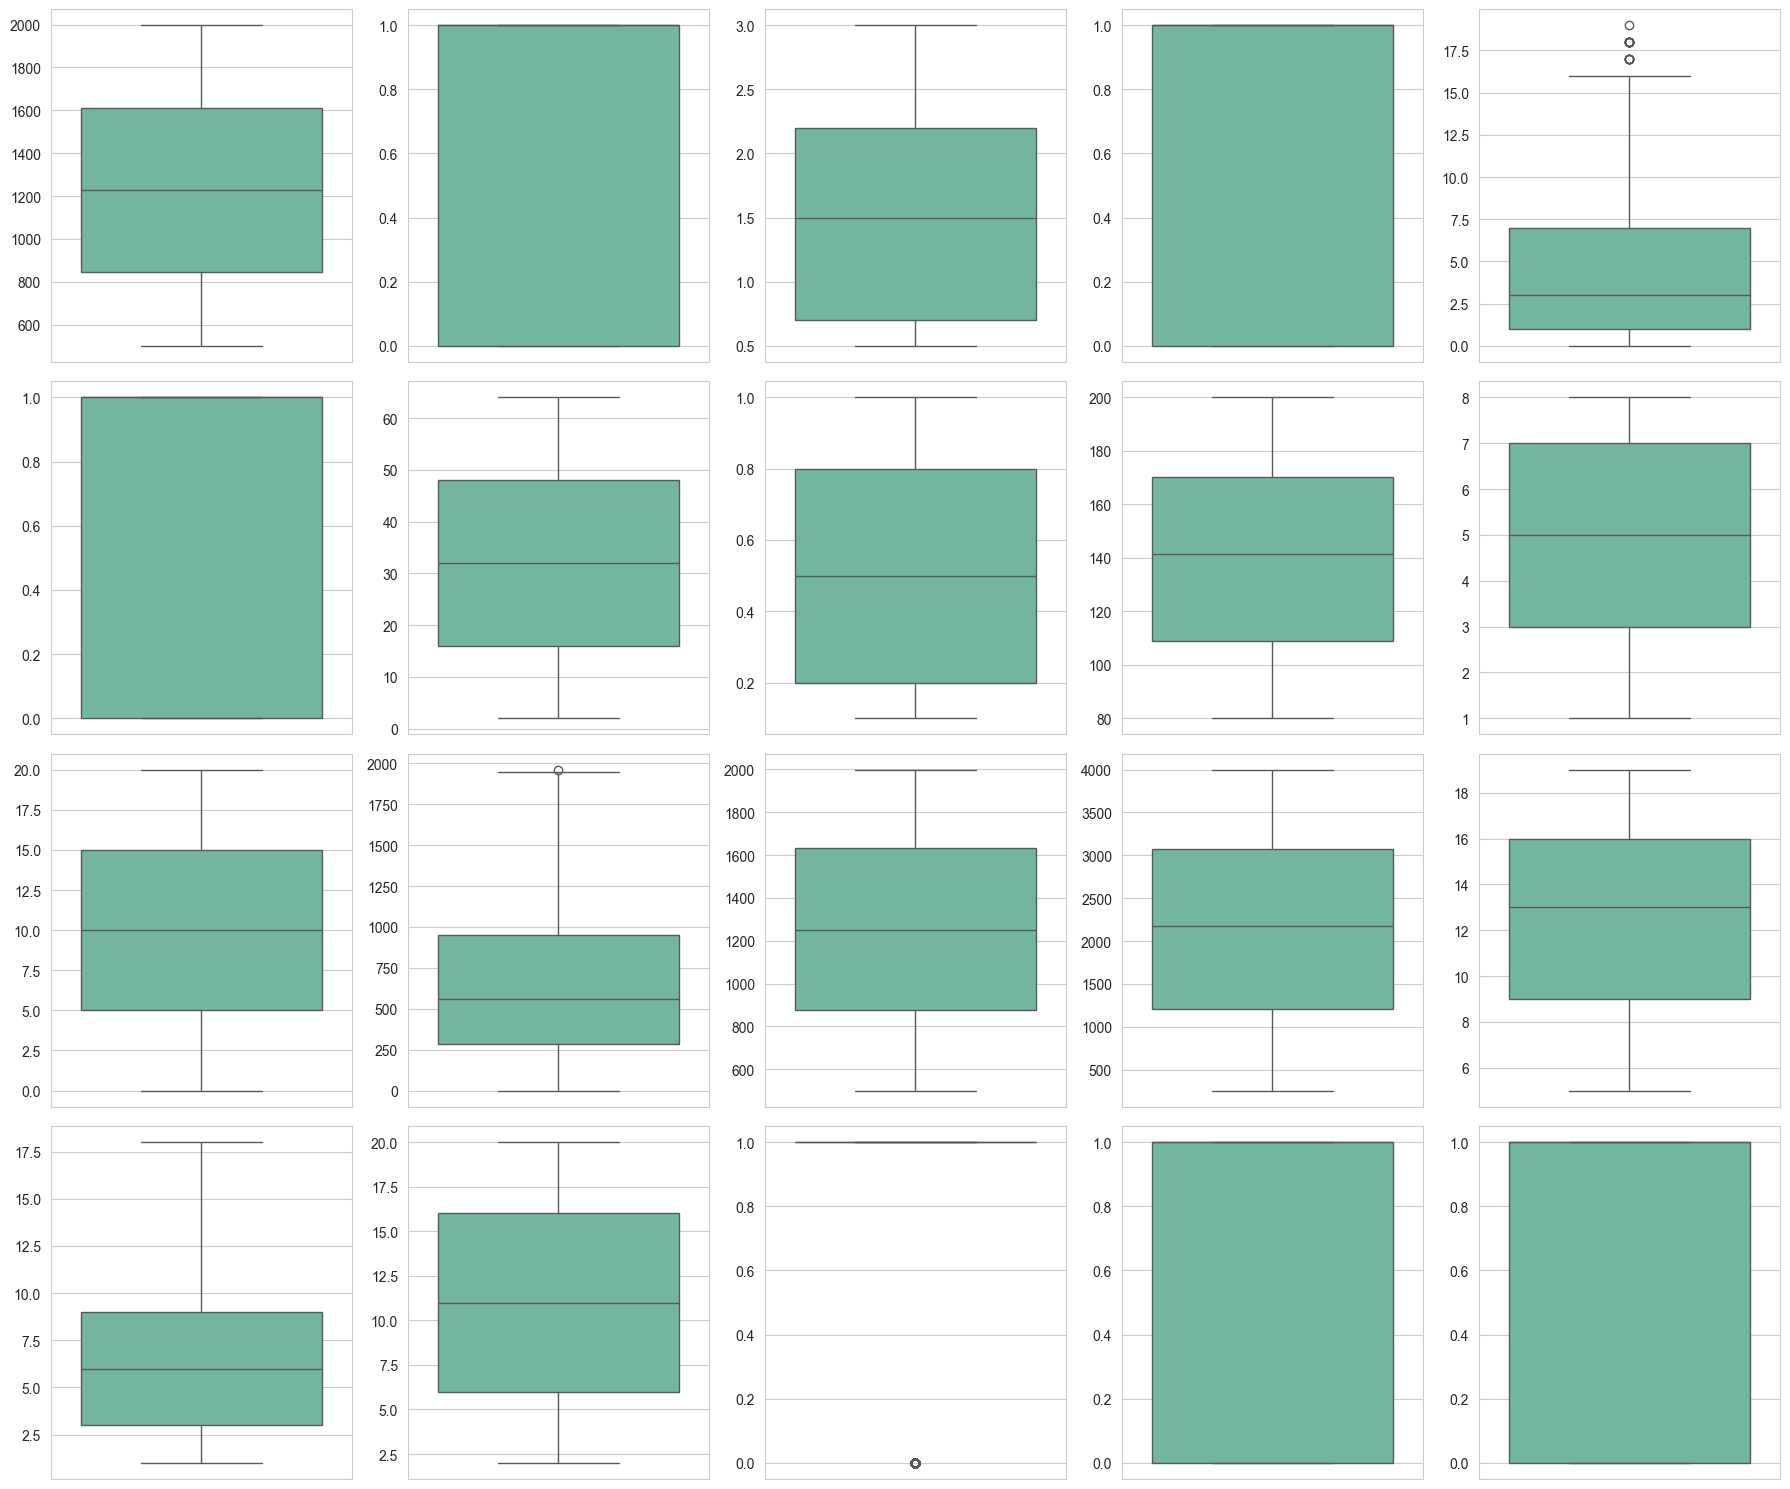

In [34]:
fig, ax = plt.subplots(4, 5, figsize = (18, 15))
count = 0
for i in range(4):
    for j in range(5):
        sns.boxplot(train_data[train_data.columns[count]], ax = ax[i][j])
        ax[i][j].set_ylabel("")
        count += 1
plt.tight_layout()

<font size = 6>Observation: - </font><br>
1) Most of them not have outliers
2) Others like (px_height, fc) seems to have outliers but keeping them to not overfit the data
________________________________

### <b> Feature Scaling </b>

In [35]:
# Initialize StandardScaler
standard_scaler = StandardScaler()

# Columns to standardize
columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Apply standardization
train_data[columns] = standard_scaler.fit_transform(train_data[columns])
test_data[columns] = standard_scaler.transform(test_data[columns])

# Display the first few rows of the standardized training data
train_data.head(), test_data.head()


(   battery_power  blue  clock_speed  dual_sim        fc  four_g  int_memory  \
 0      -0.900013     0     0.836191         0 -0.762393       0   -1.388192   
 1      -0.493029     1    -1.253274         1 -0.992083       1    1.151902   
 2      -1.534364     1    -1.253274         1 -0.532704       1    0.489268   
 3      -1.416134     1     1.204920         0 -0.992083       0   -1.222534   
 4       1.325897     1    -0.392906         0  1.993884       1    0.654927   
 
       m_dep  mobile_wt   n_cores        pc  px_height  px_width       ram  \
 0  0.346730   1.338662 -1.106635 -1.312387  -1.410270 -1.149141  0.382398   
 1  0.693079  -0.129470 -0.669742 -0.646405   0.580522  1.701234  0.457842   
 2  1.385778   0.124630  0.204043 -0.646405   1.385837  1.071930  0.432080   
 3  1.039428  -0.270636  0.640936 -0.146918   1.280112  1.233883  0.584808   
 4  0.346730   0.011697 -1.106635  0.685559   1.262116 -0.094132 -0.664618   
 
        sc_h      sc_w  talk_time  three_g  touc

In [36]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.900013,0,0.836191,0,-0.762393,0,-1.388192,0.346730,1.338662,-1.106635,-1.312387,-1.410270,-1.149141,0.382398,-0.836765,0.159636,1.465382,0,0,1,1
1,-0.493029,1,-1.253274,1,-0.992083,1,1.151902,0.693079,-0.129470,-0.669742,-0.646405,0.580522,1.701234,0.457842,1.083679,-0.804005,-0.734655,1,1,0,2
2,-1.534364,1,-1.253274,1,-0.532704,1,0.489268,1.385778,0.124630,0.204043,-0.646405,1.385837,1.071930,0.432080,-0.356654,-1.044916,-0.367982,1,1,0,2
3,-1.416134,1,1.204920,0,-0.992083,0,-1.222534,1.039428,-0.270636,0.640936,-0.146918,1.280112,1.233883,0.584808,0.843623,0.400547,-0.001310,1,0,0,2
4,1.325897,1,-0.392906,0,1.993884,1,0.654927,0.346730,0.011697,-1.106635,0.685559,1.262116,-0.094132,-0.664618,-1.076820,-1.044916,0.732036,1,1,0,1


### Train and Test Split

In [37]:
X, y = train_data.drop(columns=['price_range']), train_data['price_range']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3,random_state=42)

In [38]:
print(f'X_train: - {x_train.shape}\nX_test: - {x_val.shape}')

X_train: - (1274, 20)
X_test: - (546, 20)


### <b> Model Developement</b>

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report,accuracy_score

In [41]:
#Creating Function for measuring metrics of every model

res = {'Model':[], 'Accuracy':[], 'CV Score':[]}

def metrics(train_predicts, test_predicts, model, ensemble = False, name = ''):

    fig, ax = plt.subplots(1,2, figsize = (10,5))
    fig.suptitle(name)

    print("*"*50)
    print(f'Train Accuracy: - {np.round(accuracy_score(train_predicts, y_train), 2)*100}%')
    print(f'Test Accuracy: - {np.round(accuracy_score(test_predicts, y_val), 2)*100}%')

    print(f'\n**********Classification Report**********\n\n')
    print(classification_report(y_val, test_predicts))
    
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'**********Cross Validation**********\n\n')

    print(pd.Series(cv_scores))
    print(f'\n\nMean Score: - {np.mean(cv_scores)}\n')

    matrix = confusion_matrix(test_predicts, y_val)
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax = ax[0])
    

    if ensemble == True:
        temp = pd.DataFrame(
        model.feature_importances_,
        index=x_train.columns, columns=['Features']).sort_values('Features', ascending=True)


        ax[1].barh(temp.index, temp['Features'])
    
    res['Model'].append(name)
    res['Accuracy'].append(np.round(accuracy_score(test_predicts, y_val), 2)*100)
    res['CV Score'].append(np.round(np.mean(cv_scores), 2))
    
    plt.tight_layout()

#### Logistic Regression

In [42]:
#Hyperparameter tunning for Logistic Regression
param_grid = {
    'C': [0.1, 1.0, 10.0, 100],  # Regularization parameter
    'penalty': ['l1', 'l2',None],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solver algorithm (To find Optimal Weights)
    'max_iter': [100, 200, 300, 400, 500]  # Maximum number of iterations
}

scoring = 'accuracy'

grid_search_logistic = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_search_logistic.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0, 100],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [44]:
grid_search_logistic.best_estimator_

LogisticRegression(max_iter=500, penalty=None, solver='saga')

**************************************************
Train Accuracy: - 99.0%
Test Accuracy: - 97.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       133
           1       0.95      0.97      0.96       144
           2       0.99      0.94      0.96       142
           3       0.97      1.00      0.98       127

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546

**********Cross Validation**********


0    0.978022
1    0.964286
2    0.975275
3    0.975275
4    0.964286
dtype: float64


Mean Score: - 0.9714285714285713



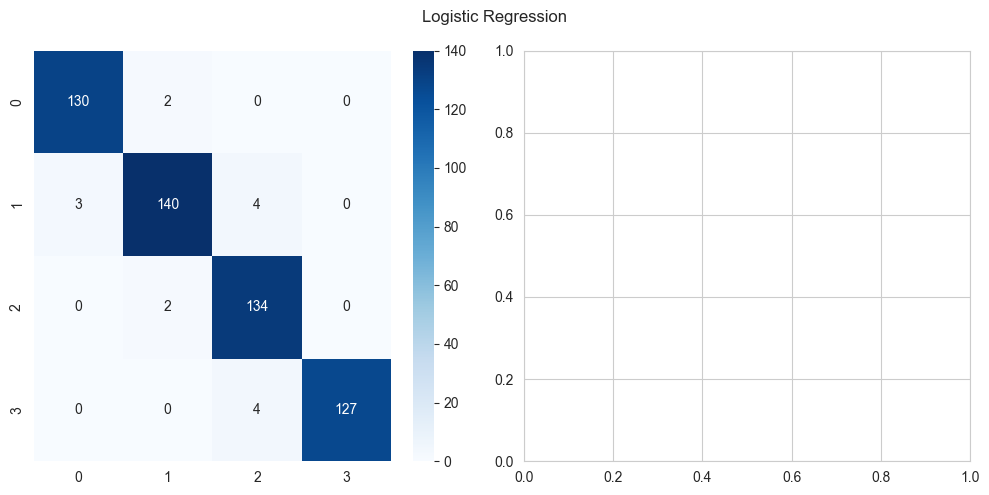

In [45]:
model_logistic = grid_search_logistic.best_estimator_

metrics(model_logistic.predict(x_train), model_logistic.predict(x_val),model=model_logistic, name='Logistic Regression')

In [46]:
coef = model_logistic.coef_
inter = model_logistic.intercept_

print("The Coefficients are : ",coef)
print("\nThe intercept is : ", inter)

The Coefficients are :  [[-1.04517485e+01  2.39768781e-01 -8.32275315e-02  4.33637346e-01
  -4.56992816e-02  2.44026062e-01 -6.42213827e-01  9.72605075e-02
   1.68616966e+00 -3.14530752e-01 -7.72099171e-02 -6.60030794e+00
  -5.78975476e+00 -4.17743123e+01 -1.06271587e-01 -7.70730697e-02
  -1.62773056e-02  3.33602729e-01  9.42706652e-01  1.30662216e+00]
 [-3.69228858e+00  1.81153736e-02 -1.67747860e-02 -2.39055479e-01
  -3.16944971e-02 -1.69309923e-01 -2.65137497e-01  1.46143059e-01
   5.96441611e-01 -2.28271806e-01 -2.77130852e-01 -2.16864542e+00
  -2.24595432e+00 -1.45072406e+01 -1.23167874e-01 -1.58458741e-01
  -1.53573453e-01 -1.30951980e-01  2.19630570e-01  7.93617619e-01]
 [ 3.63732857e+00  3.03618604e-01 -7.73761749e-02 -3.59774809e-01
  -1.21534166e-01 -3.33991972e-01  3.12449404e-02 -1.18311190e-01
  -2.44959351e-01  9.06379782e-03  1.84451995e-01  2.08134557e+00
   1.91110745e+00  1.42694695e+01 -3.54654466e-01  2.17885159e-01
   6.58690438e-02 -3.36708153e-02 -4.41341172e-01 

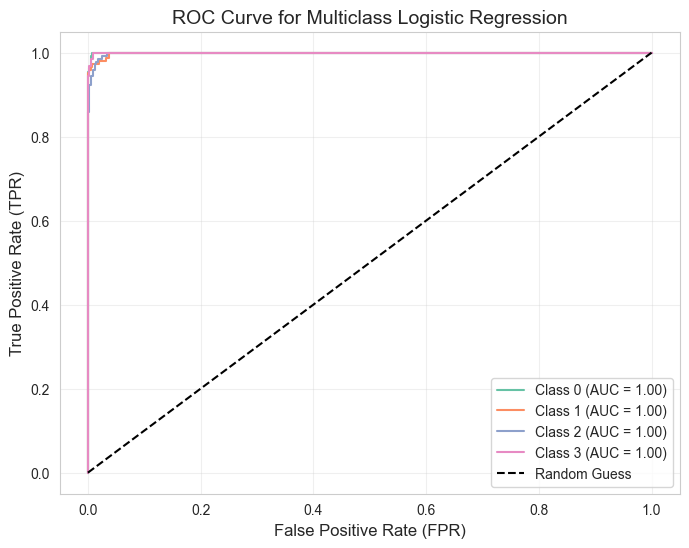

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass (one-vs-rest)
classes = sorted(y_val.unique())  # Replace with the actual classes if needed
y_val_binarized = label_binarize(y_val, classes=classes)
n_classes = y_val_binarized.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    y_val_proba = model_logistic.predict_proba(x_val)[:, i]
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_proba)
    roc_auc = roc_auc_score(y_val_binarized[:, i], y_val_proba)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for Multiclass Logistic Regression', fontsize=14)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


#### Decision Tree

In [48]:
max_depth = [5, 10, 50, 100, 150, 200,500, 1000]
min_samples_split = [2,5,10, 12, 14]
min_samples_leaf = [5, 10, 20, 50, 100]

grid_dt_para = {
                'max_depth':max_depth,
                'min_samples_split': min_samples_split,
                'criterion':['gini','entropy',None],
                'min_samples_leaf':min_samples_leaf}

grid_df_CV = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_dt_para, cv=5, scoring='accuracy', n_jobs=-1)

grid_df_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', None],
                         'max_depth': [5, 10, 50, 100, 150, 200, 500, 1000],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10, 12, 14]},
             scoring='accuracy')

In [49]:
grid_df_CV.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10)

**************************************************
Train Accuracy: - 92.0%
Test Accuracy: - 83.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.87      0.93      0.90       133
           1       0.84      0.73      0.78       144
           2       0.78      0.76      0.77       142
           3       0.83      0.91      0.87       127

    accuracy                           0.83       546
   macro avg       0.83      0.83      0.83       546
weighted avg       0.83      0.83      0.83       546

**********Cross Validation**********


0    0.857143
1    0.848901
2    0.859890
3    0.837912
4    0.832418
dtype: float64


Mean Score: - 0.8472527472527472



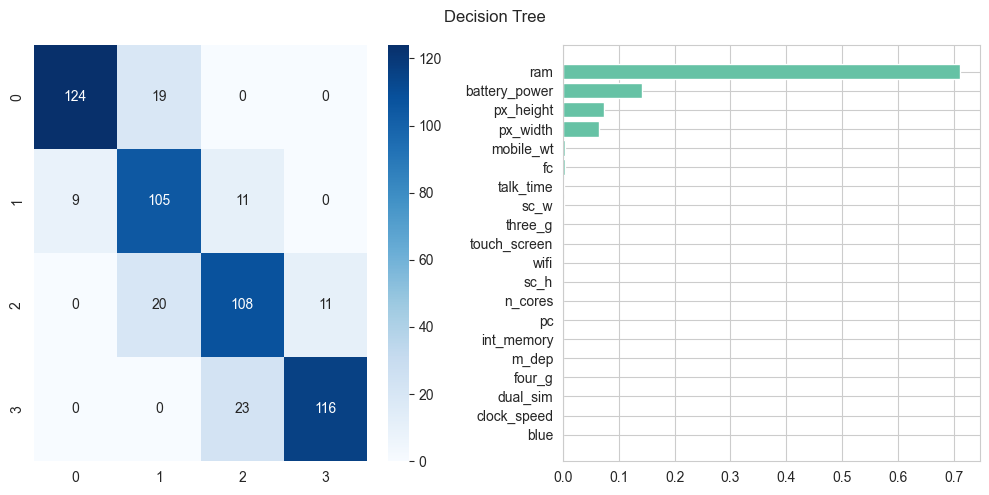

In [50]:
model_dt = grid_df_CV.best_estimator_

metrics(model_dt.predict(x_train), model_dt.predict(x_val), model_dt, ensemble=True, name = 'Decision Tree')

#### Random Forest

In [51]:
n_estimators = [5, 10, 50,100]
max_depth = [10, 25, 50, 100, 120,500]
min_samples_split = [2,5,10, 15]
min_samples_leaf = [1,2,4,6]

grid_rf_para = {
                'max_depth':max_depth,
                'min_samples_split': min_samples_split,
                'criterion':['gini','entropy',None],
                'min_samples_leaf':min_samples_leaf,
                'n_estimators':n_estimators}

grid_rf_CV = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf_para, cv=5, n_jobs=-1)

grid_rf_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', None],
                         'max_depth': [10, 25, 50, 100, 120, 500],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [5, 10, 50, 100]})

In [52]:
grid_rf_CV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_split=5)

**************************************************
Train Accuracy: - 100.0%
Test Accuracy: - 86.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       133
           1       0.87      0.81      0.84       144
           2       0.79      0.76      0.77       142
           3       0.84      0.94      0.89       127

    accuracy                           0.86       546
   macro avg       0.87      0.87      0.87       546
weighted avg       0.86      0.86      0.86       546

**********Cross Validation**********


0    0.884615
1    0.879121
2    0.909341
3    0.870879
4    0.859890
dtype: float64


Mean Score: - 0.8807692307692306



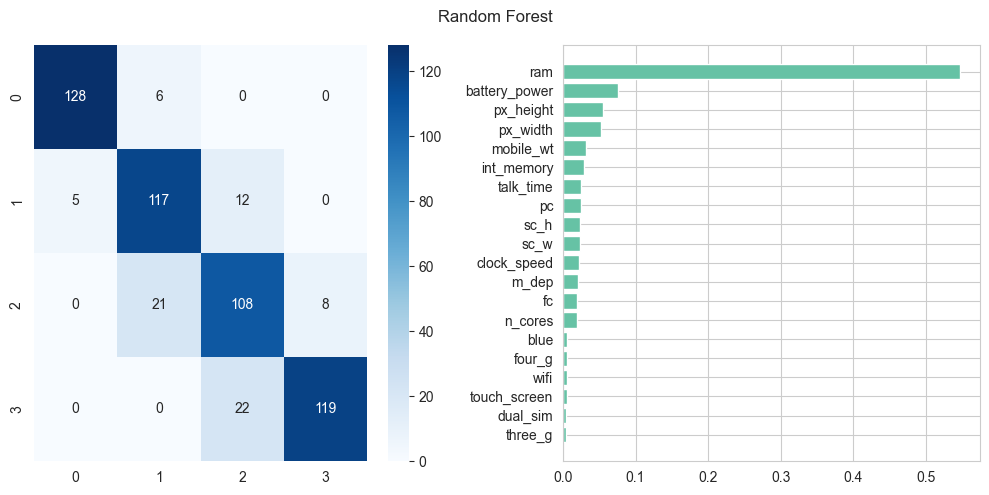

In [53]:
model_rf = grid_rf_CV.best_estimator_

metrics(model_rf.predict(x_train), model_rf.predict(x_val), model= model_rf, name='Random Forest', ensemble=True)

#### XGBOOST

In [54]:
xgb_model = XGBClassifier(objective='binary:logistic')

param_grid_xgb = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

grid_xg_cv = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

grid_xg_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

**************************************************
Train Accuracy: - 100.0%
Test Accuracy: - 90.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       133
           1       0.92      0.87      0.89       144
           2       0.84      0.86      0.85       142
           3       0.90      0.91      0.91       127

    accuracy                           0.90       546
   macro avg       0.90      0.90      0.90       546
weighted avg       0.90      0.90      0.90       546

**********Cross Validation**********


0    0.917582
1    0.923077
2    0.928571
3    0.912088
4    0.903846
dtype: float64


Mean Score: - 0.917032967032967



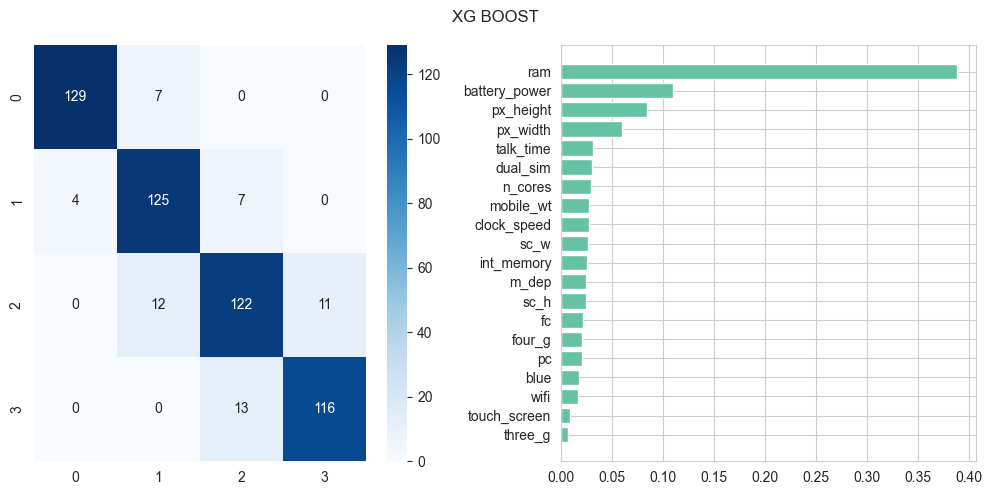

In [125]:
model_xgb = grid_xg_cv.best_estimator_
metrics(model_xgb.predict(x_train), model_xgb.predict(x_val), model = model_xgb, name='XG BOOST', ensemble=True)

#### SVC

In [126]:
param_grid_svm = {'C':[1, 10, 25, 50, 100],
                  'kernel':['linear', 'poly', 'rbf', 'sigmoid'],}

grid_svm_CV = GridSearchCV(estimator=SVC(probability=True), param_grid=param_grid_svm, n_jobs=-1, scoring='accuracy', cv=5)
grid_svm_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 25, 50, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

**************************************************
Train Accuracy: - 99.0%
Test Accuracy: - 97.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       133
           1       0.95      0.97      0.96       144
           2       0.98      0.92      0.95       142
           3       0.95      1.00      0.98       127

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546

**********Cross Validation**********


0    0.975275
1    0.969780
2    0.978022
3    0.969780
4    0.964286
dtype: float64


Mean Score: - 0.9714285714285713



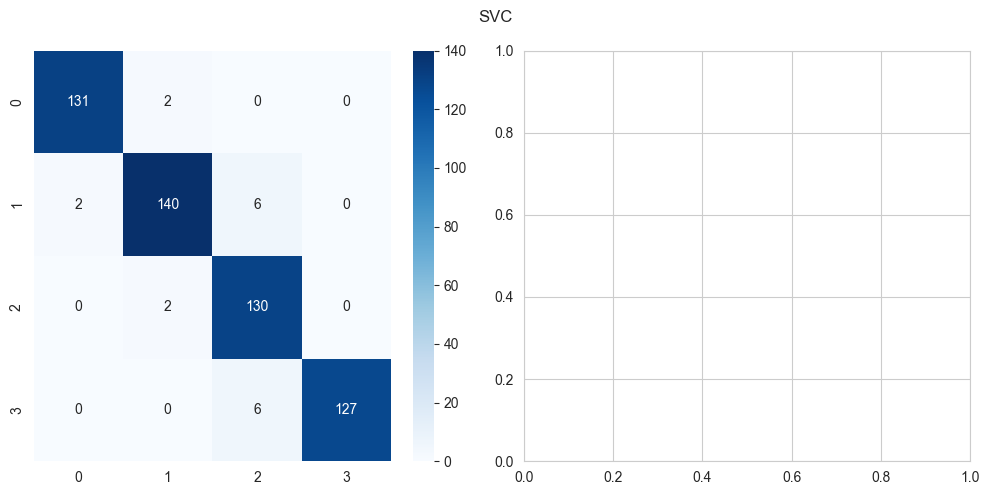

In [127]:
model_svc = grid_svm_CV.best_estimator_

metrics(model_svc.predict(x_train), model_svc.predict(x_val), model = model_svc, name = 'SVC')

#### Naive Bayes

**************************************************
Train Accuracy: - 81.0%
Test Accuracy: - 79.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       133
           1       0.75      0.67      0.71       144
           2       0.66      0.70      0.68       142
           3       0.84      0.89      0.87       127

    accuracy                           0.79       546
   macro avg       0.79      0.79      0.79       546
weighted avg       0.79      0.79      0.79       546

**********Cross Validation**********


0    0.788462
1    0.818681
2    0.813187
3    0.780220
4    0.785714
dtype: float64


Mean Score: - 0.7972527472527473



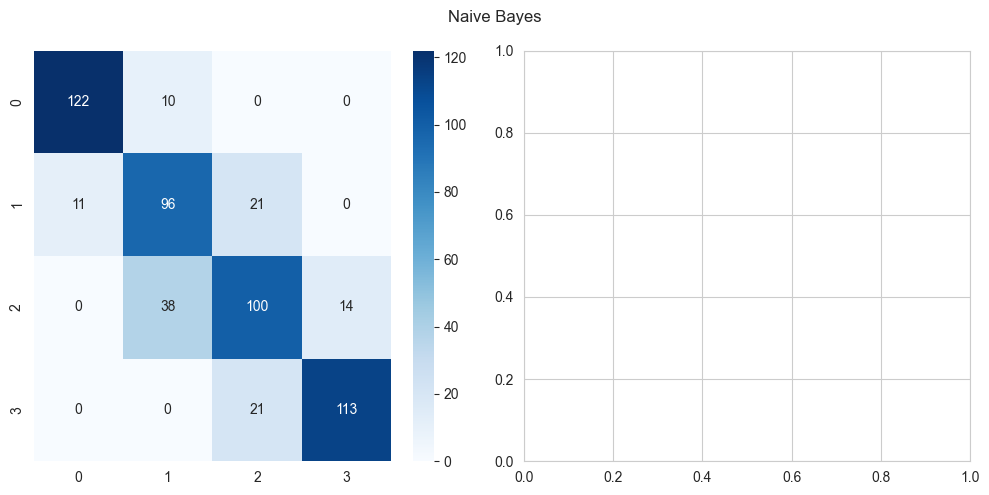

In [128]:
model_nb = GaussianNB().fit(x_train, y_train)

metrics(model_nb.predict(x_train), model_nb.predict(x_val), model=model_nb, name = 'Naive Bayes')

### Comparing Models Accuracy

In [129]:
compare_model = pd.DataFrame(res)

compare_model.set_index('Model', inplace=True)

compare_model

,Accuracy,CV Score
Model,,
Logistic Regression,97.0,0.97
Decision Tree,82.0,0.85
Random Forest,88.0,0.87
XG BOOST,90.0,0.92
SVC,97.0,0.97
Naive Bayes,79.0,0.80


#### <b> Best accuracy is given by both Logistic and SVC Model of abouot 97% Accuracy and Cross validation score </b>

##### Fitting all the training data on the models and predicting the test data Price Range

In [130]:
model_logistic.fit(X, y)
model_dt.fit(X, y)
model_rf.fit(X, y)
model_xgb.fit(X, y)
model_svc.fit(X, y)
model_nb.fit(X, y)

GaussianNB()

In [131]:
id = test_data['id']
test_data.drop(columns=['id'], inplace=True)

In [132]:
final = pd.DataFrame({'ID':id, 
                      'Price_Range_Logistic':model_logistic.predict(test_data),
                      'Price_Range_DT':model_dt.predict(test_data),
                      'Price_Range_RF':model_rf.predict(test_data),
                      'Price_Range_SVC':model_svc.predict(test_data),
                      'Price_Range_NVB':model_nb.predict(test_data),
                      'Price_Range_XGB':model_xgb.predict(test_data)})
final.set_index('ID', inplace=True)

In [133]:
final.head()

,Price_Range_Logistic,Price_Range_DT,Price_Range_RF,Price_Range_SVC,Price_Range_NVB,Price_Range_XGB
ID,,,,,,
1,3,3,3,3,3,3
3,2,3,2,2,2,2
5,1,1,1,1,1,1
6,3,3,3,3,3,3
7,3,3,3,3,3,3
